# DATA SCIENCE SESSIONS VOL. 5
### A Foundational Python Data Science Course
## Bonus Session: Neural Networks: Multilayer Perceptron. Backpropagation. Gradient Descent.

[&larr; Back to course webpage](https://datakolektiv.com/)

Feedback should be send to [goran.milovanovic@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com). 

These notebooks accompany the DATA SCIENCE SESSIONS VOL. 5 :: A Foundational Python Data Science Course.

![](../img/IntroRDataScience_NonTech-1.jpg)

### Lecturers

[Goran S. Milovanović, PhD, DataKolektiv, Chief Scientist & Owner](https://www.linkedin.com/in/gmilovanovic/)

[Aleksandar Cvetković, PhD, DataKolektiv, Consultant](https://www.linkedin.com/in/alegzndr/)

[Ilija Lazarević, MA, DataKolektiv, Consultant](https://www.linkedin.com/in/ilijalazarevic/)

![](../img/DK_Logo_100.png)

***

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## 1. Perceptron

<img src="perceptron.png" width="250">

*Perceptron* is the simplest possible neural network. It consists of *input vector* $\mathbf{x} = (x_1, x_2, \ldots, x_k)$, *weights* $\mathbf{w} = (w_1, w_2, \ldots, w_k)$, (non-linear) *activation function* $f$ and output $\hat{y}$.

Weights $\mathbf{w}$ are the learnable parameter of the model, and perceptron calculates output value $\hat{y}$ via

$$ \hat{y} = f(\mathbf{x}\cdot\mathbf{w}). $$

A perceptron learns model parameters in two steps:
- forward feed
- backpropagation.

In *forward feed* we simply calculate the output value $\hat{y}$ from the given input $\mathbf{x}$ and current weights $\mathbf{w}$ via the above formula. The value $\hat{y}$ is in fact the predicted value of the target variable $y$. 

*Backpropagation* consists of the following steps:

- First, we compute the error of our prediction, i.e. the deviation of model prediction $\hat{y}$ from the true value $y$, using a *loss function* $\mathcal{L}$ or a *cost function* $\mathcal{J}$. The most commonly used loss functions for regression problems are *squared loss* (or $L_2$ loss):

$$ \mathcal{L}(y, \hat{y}; \mathbf{w}) = \frac{1}{2}(\hat{y} - y)^2, $$

$\quad$ and *absolute loss* (or $L_1$ loss):

$$ \mathcal{L}(y, \hat{y}; \mathbf{w}) = |\hat{y} - y|.$$

$\quad$ For classification problems, the *cross-entropy loss*

$$ \mathcal{L}(y, \hat{y}; \mathbf{w}) = -y\ln\hat{y} - (1 - y)\ln(1-\hat{y}) $$

$\quad$ is the common choice. 

$\quad$ While the loss function is computed over one observation, the cost function is computed over the whole sample, usually as the mean of the loss function over the entire sample

$$\mathcal{C}(\mathbf{w}) = \frac{1}{N}\sum_{i=1}^N\mathcal{L}(y^{(i)}, \hat{y}^{(i)}; \mathbf{w}),$$

$\quad$ where $N$ is the sample size. Thus, for the cost function we may have *mean-squared error (MSE)*, *mean-absolute error (MAE)*, etc.

- Next, in backpropagation, we need to compute partial derivatives of the cost function 

$$ \frac{\partial\mathcal{C}(\mathbf{w})}{\partial w_j},\quad j=1,\ldots,k,$$

$\quad$ utilizing *Leibniz Chain Rule*. For a perceptron, the computation of these partial derivatives is pretty straightforward. However, for more complex neural networks an iterative algorithm is used. 

- Finally, we perform an iteration of some *optimization algorithm*, which utilizes the calculated partial derivatives, in order to update the weights; this is also known as *error correction*. The most commonly used optimization algorithm is *gradient descent*, which updates the weights in the following manner

$$w_j := w_j - \alpha\frac{\partial \mathcal{C}(\mathbf{w})}{\partial w_j},\quad j=1,\ldots,k,$$

$\quad$ where $\alpha$ is a preset *learning Rate hyperparameter*. Other oftenly used optimization algorithms include *Stochastic Gradient Descent (SGD)*, *Adaptive Moment Estimation (ADAM)*, *Nesterov-ADAM (NADAM)*, etc.

Over many iterations of forward feed and backpropagations, called *epochs*, the weights are updated and the error between the predictions and true values is reduced; this is how the perceptron/neural network learns. 

***

Now we will see this theory in action via practical example.

For the purpose of illustration, we load a small dataset, which outputs whether the patient has a benign or malignant tumor from given set of parameters. We shall train a perceptron to give us prediction of a tumor type.

In [2]:
df = pd.read_csv('breast_cancer_data.csv')
df

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class:
0,8,10,10,8,7,10,9,7,1,1
1,5,3,3,3,2,3,4,4,1,1
2,1,1,1,1,2,3,3,1,1,0
3,8,7,5,10,7,9,5,5,4,1
4,7,4,6,4,6,1,4,3,1,1
5,4,1,1,1,2,1,2,1,1,0
6,4,1,1,1,2,1,3,1,1,0
7,10,7,7,6,4,10,4,1,2,1
8,6,1,1,1,2,1,3,1,1,0
9,7,3,2,10,5,10,5,4,4,1


As each input has 9 features, the input vector $\mathbf{x}$ is going to be of size 9, as well as our weight-vector $\mathbf{w}$. For the activation function, we'll choose *sigmoid function*

$$f\equiv\sigma(z) = \frac{1}{1+e^{-z}}, $$ 

and for the cost function we choose *mean categorical cross-entropy*. So, our perceptron computes the output via

$$\hat{y} = \sigma({\mathbf{x}\cdot\mathbf{w}) = \frac{1}{1+e^{-\mathbf{x}\cdot\mathbf{w}}}}.$$

This way, in essence, we recover a *Binomial Logistic Regression* model with coefficients $w_1, \ldots, w_9$, and the intercept set to $w_0 = 0$. The predictions $\hat{y}$ are the probabilities that the patient has a malignant tumor.

For the forward feed, we just need to compute $\hat{y}$. For the backpropagation, we use some basic Calculus to compute partial derivatives

$$
\frac{\partial\mathcal{L}(\hat{y}(\mathbf{w}))}{\partial w_j} =  \frac{\partial\mathcal{L}(\hat{y})}{\partial\hat{y}}\frac{\partial\hat{y}}{\partial w} = \frac{\partial\mathcal{L}(\hat{y})}{\partial\hat{y}}\frac{\partial\sigma(\mathbf{w})}{\partial w_j} = (\hat{y} - y)x_j.
$$

From here, we get

$$\frac{\partial \mathcal{C}(\mathbf{w})}{\partial w_j} = \frac{1}{32}\sum_{i=1}^{32}(\hat{y}^{(i)} - y^{(i)})x_j^{(i)},\quad j=1,\ldots,9.$$

We can now perform the backpropagation, using gradient descent; we set the learning rate hyperparameter $\alpha = 0.3$, and set the initial weight values $\mathbf{w} = \mathbf{0}$.

In [3]:
# forward feed (i.e. the sigmoid function)
def y_hat(x, w):
    return 1/(1 + np.exp(-w@x))

# loss function (i.e. categorical cross-entropy)
def L(x, y, w):
    return -y*np.log(y_hat(x, w)) - (1-y)*np.log(1-y_hat(x, w))

# cost function (i.e. mean categorical cross-entropy)
def C(X, y, w):
    cost = 0
    for i in range(len(X)):
        cost += L(X[i], y[i], w)
    return (1/len(X))*cost

# partial derivaive of a cost function
def partial_C(X, y, w, j):
    C_val = 0
    for i in range(len(X)):
        C_val += (y_hat(X[i], w) - y[i])*X[i,j]
    return (1/len(X))*C_val

In [4]:
def backprop(X, y, lr=.4, steps=10**3):
    
    # initialize parameter vector theta
    w = np.zeros(X.shape[1])
    k = 0
    costs = [C(X, y, w)]
    
    while k <= steps:
        
        # updating weights via gradient descent
        for j in range(X.shape[1]):
            w[j] = w[j] - lr*partial_C(X, y, w, j)
            
        # calculate the value of the cost function after the update
        cost = C(X, y, w)
        costs.append(cost)
        
        if k % 100 == 0:
            print(f"Step: {k}, current cost: {cost}")
        
        k += 1
    
    
    
    plt.plot(np.arange(0, steps+2), costs)
    
    return w, cost

In [5]:
X_train = df.iloc[:,:-1].values
print('Feature matrix:', X_train.shape)

y_train = df.iloc[:,-1].values
print('Target values:', y_train.shape)

Feature matrix: (32, 9)
Target values: (32,)


Step: 0, current cost: 0.6412849965419337
Step: 100, current cost: 0.11179744128314809
Step: 200, current cost: 0.07974281749172213
Step: 300, current cost: 0.06271463334189006
Step: 400, current cost: 0.05162081982382711
Step: 500, current cost: 0.043774833916187965
Step: 600, current cost: 0.03795102959191978
Step: 700, current cost: 0.03347322044681179
Step: 800, current cost: 0.02993242168115756
Step: 900, current cost: 0.027067152526176235
Step: 1000, current cost: 0.024703284966430667
The final cost function value: 0.024703284966430667


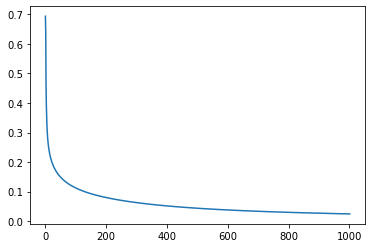

In [6]:
w, cost = backprop(X=X_train, y=y_train, lr=.4)
print(f"The final cost function value: {cost}")

In [7]:
# the prediction function
def predict(X, y, w):
    
    correct_preds = 0
    
    for i in range(len(X)):
        # if the predicted probability is > 0.5, we label the tumor as malignant
        y_pred = int(y_hat(X[i], w) > .5)
        correct_preds += int(y_pred == y[i])
        
    print(f'Accuracy of our model: {round(correct_preds/len(X)*100, 2)}%')

In [8]:
predict(X_train, y_train, w)

Accuracy of our model: 100.0%


***

For classification problems we might have several output neurnons $\mathbf{\hat{y}} = (\hat{y}_1, \ldots, \hat{y}_c)$ instead of a single one $\hat{y}$; $c$ is the number of classes. In this case, each output neuron $\hat{y}_j$ can be considered as a simple perceptron with input neurons $\mathbf{x} = x_1, \ldots, x_k$, and corresponding weights $\mathbf{w}_j = (w_{1j}, \ldots, w_{kj}).$ We compute value of the output node $\hat{y}_j$ via

$$ \hat{y}_j = f(\mathbf{x}\cdot\mathbf{w}_j),\quad j=1,\ldots,c.$$

As we have weights $\mathbf{w}_1, \ldots, \mathbf{w}_c$ for every output neuron, we can stack them up, to form a *weight-matrix* $W$ (of shape $k\times c$). We can then write a forward feed into a more compact vector-matrix notation 

$$ \hat{\mathbf{y}} = f(\mathbf{x}^TW).$$

## 2. Multi-Layer Perceptron

<img src="mlp2h.png" width="500">

Our perceptron performed perfectly... on a small training set. We can easily assume that this is a case of heavy overfit. Even if we had some bigger or more complex dataset, we would get significantly weaker performance for a simple perceptron. But neural networks can grow grow much bigger. One of the most simpler architecture is a *Multi-Layer Perceptrons (MLPs)*. It is built by adding *hiden layers*, i.e. neurons between the input and the output neurons. 

For the illustration purpose, we describe an MLP with one hidden layer. 

<img src="mlp1h.png" width="250">

In this architecture we have input layer $\mathbf{x}^{inp}$, consisting of input neurons $x_1^{inp}, \ldots, x_k^{inp}$, hidden layer $\mathbf{x}^h$, consisting of hidden neurons $x_1^h,\ldots,x_l^h$, and an output layer $\hat{\mathbf{y}}$ consisting of output neurons $\hat{y}_1, \ldots, \hat{y}_c$. Hidden layer $\mathbf{x}^h$ is an output of input layer $\mathbf{x}^{inp}$ and the appropriate weights matrix $W^h$ (of shape $k\times l$). We compute the values of the hidden layer via

$$ \mathbf{x}^h = f_h((\mathbf{x}^{inp})^TW^h),$$

where $f_h$ is an activation function for the hidden layer. 

Moreover, if we have $n$ observations in our sample, we can stack all the observations into an input matrix $X^{inp}$ of shape $n\times k$, which we feed into the input layer. With this in mind, we can write the previous equation more compactly in matrix notation, which will come quite handy for the implementation:

$$ X^h = f_h(X^{inp}W^h). $$

The output layer is actually a simple perceptron which has hidden neurons as input, along with the corresponding weights $W^{out}$ (of shape $l\times c$). Finally, the output of our neural network is computed by

$$\hat{Y} = f_{out}(X^{h}W^{out}).$$

Compactly, we write the forward feed of an MLP with a single hidden layer as

$$ \hat{Y} = f_{out}(f_h(X^{inp}W^h)W^{out}),$$

which is actually a forward feed of our neural network.

***

Computing partial derivatives of loss/cost function for MLP can be tricky, but there's a set of recursive formulas that can help us out. Note that now we have $\mathcal{C}\equiv\mathcal{C}(W^h, W^{out})$, which we'll shortly write $\mathcal{C}(W)$. To apply these formulas, it is convenient to set

$$Z^h = X^{inp}W^h,\qquad [X^h = f_h(Z^h)]$$

$$Z^{out} = X^hW^{out},\qquad [\hat{Y} = f_{out}(Z^{out})];$$

these values are called *weighted inputs*.

So, we the partial derivatives we need to compute are:

$$\frac{\partial \mathcal{C}(W)}{\partial W^{out}} = \frac{1}{N}(X^h)^T\delta^{out},$$


$$\frac{\partial \mathcal{C}(W)}{\partial W^h} = \frac{1}{N}(X^{inp})^T\delta^h,$$

where we compute matrices $\delta^{out}$ and $\delta^h$ (called *errors*) recursively

$$\delta^{out} = \frac{\partial\mathcal{L}(\hat{Y})}{\partial Z^{out}} =  \frac{\partial\mathcal{L}(\hat{Y})}{\partial\hat{Y}}\circ\frac{\partial f_{out}(Z^{out})}{\partial Z^{out}},$$

$$\delta^h = \frac{\partial\mathcal{L}(\hat{Y})}{\partial Z^h} = (\delta^{out}(W^{out})^T)\circ\frac{\partial f_h(Z^h)}{\partial Z^h}.$$

The operation $\circ$ is called *Hadamard Product*, and it is actually an elementwise matrix multiplication.

Finally, we update the weights

$$W^{out} := W^{out} - \alpha\frac{\partial \mathcal{C}(W)}{\partial W^{out}},$$

$$W^h := W^h - \alpha\frac{\partial \mathcal{C}(W)}{\partial W^h}.$$

***

Let's see this theory in action. We'll use a one-layer MLP on the Iris dataset to perform a classification of flowers based on given set of parameters.

In [9]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Our target variable has three classes, which we'll dummy-encode.

In [10]:
Y = pd.get_dummies(df.Species).values
X = df.drop(["Id", "Species"], axis=1).values

Our construct a neural networ consisting of one hidden layer with 2 neurons. So, our MLP has 4-2-3 structure:
- Input layer has 4 neurons, as our data has 4 features;
- Hidden layer has 2 neurons;
- Output layer has 3 neurons - each for one class, and each will predict probability of a flower belonging to a given class.

For our MLP, weight matrix $W^h$ is of shape $4\times 2$, and $W^{out}$ of shape $2\times 3$.

We take sigmoid function as an activation for both the hidden and output layer, so $f_h \equiv f_{out} \equiv\sigma$.

For the loss function $\mathcal{L}$, we take squared-error.

As our sample consists of 150 observations, our input matrix $X^{inp}$ is of shape $150\times 4$, and our output matrix $\hat{Y}$ has shape $150\times 3$. The forward feed can be expressed via formula:

$$\hat{Y} = \sigma(\sigma(X^{inp}W^h)W^{out}).$$

***

And now - the backpropagation. As our loss function of choice is squared-error, we have 

$$\frac{\partial\mathcal{L}(\hat{Y})}{\partial\hat{Y}} = \hat{Y} - Y,$$

where $Y$ is matrix of true values for flower class. Furthermore, we have

$$\frac{\partial\sigma(Z^{out})}{\partial Z^{out}} = \sigma(Z^{out})\circ(1 - \sigma(Z^{out})) = \hat{Y}\circ(1 - \hat{Y}).$$

Similarly, 

$$\frac{\partial\sigma(Z^h)}{\partial Z^h} = \sigma(Z^h)\circ(1 - \sigma(Z^h)) = X^h\circ(1 - X^h).$$

Now we have

$$\delta^{out} = (\hat{Y} - Y)\circ\hat{Y}\circ(1 - \hat{Y}),\qquad {\rm (1)}$$


$$\delta^h = (\delta^{out}(W^{out})^T)\circ X^h\circ(1 - X^h).\qquad {\rm (2)}$$

Partial derivatives are therefore obtained via

$$\frac{\partial \mathcal{C}(W)}{\partial W^{out}} = \frac{1}{150}(X^h)^T\delta^{out}, \qquad {\rm (3)}$$


$$\frac{\partial \mathcal{C}(W)}{\partial W^h} = \frac{1}{150}(X^{inp})^T\delta^h. \qquad {\rm (4)}$$

Finally, we train our MLP.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=20, random_state=4)
N = Y_train.size

In [12]:
# helper functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(predictions, labels):
    N = labels.size
    mse = ((predictions - labels)**2).sum() / (2*N)
    
    return mse

def accuracy(predictions, labels):
    predicions_correct = predictions.argmax(axis=1) == labels.argmax(axis=1)
    accuracy = predicions_correct.mean()
    
    return accuracy

In [13]:
def train_mlp(X_train, Y_train, learning_rate=.1, epochs=1000):

    # hyperparameters
    n_input = 4
    n_hidden = 2
    n_output = 3

    # initializing weight matrices
    np.random.seed(10)
    weights_hidden = np.random.normal(scale=0.5, size=(n_input, n_hidden))   # (4, 2)
    weights_out = np.random.normal(scale=0.5, size=(n_hidden, n_output))  # (2, 3)

    # training the neural net
    monitoring = {"mean_squared_error": [], "accuracy": []}
    for epoch in range(epochs):    

        # feedforward
        Z_hidden = np.dot(X_train, weights_hidden)
        X_hidden = sigmoid(Z_hidden)

        Z_out = np.dot(X_hidden, weights_out)
        Y_hat = sigmoid(Z_out)


        # monitor training process
        mse = mean_squared_error(Y_hat, Y_train)
        acc = accuracy(Y_hat, Y_train)

        monitoring["mean_squared_error"].append(mse)
        monitoring["accuracy"].append(acc)


        # backpropagation
        delta_out = (Y_hat - Y_train) * Y_hat * (1 - Y_hat) #equation (1)
        delta_hidden = np.dot(delta_out, weights_out.T) * X_hidden * (1 - X_hidden) #equation (2)


        # weight updates
        weights_out_update = np.dot(X_hidden.T, delta_out)/N #equation (3)
        weights_hidden_update = np.dot(X_train.T, delta_hidden)/N #equation (4)

        weights_out = weights_out - learning_rate * weights_out_update
        weights_hidden = weights_hidden - learning_rate * weights_hidden_update

        monitoring_df = pd.DataFrame(monitoring)
        
    # plotting the results    
    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    monitoring_df.mean_squared_error.plot(ax=axes[0], title="Mean Squared Error")
    monitoring_df.accuracy.plot(ax=axes[1], title="Accuracy");
        
    return weights_hidden, weights_out, monitoring_df

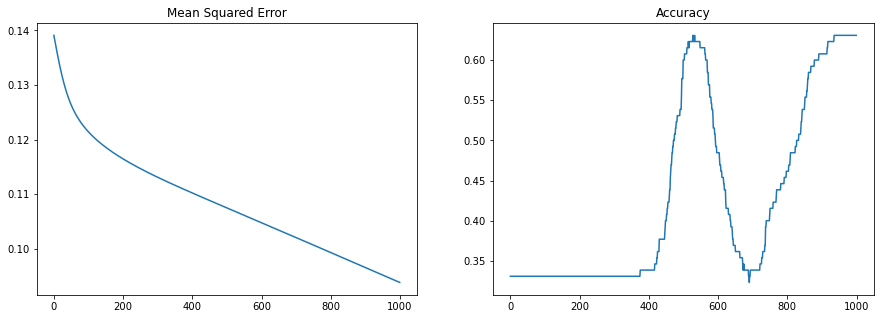

In [14]:
weights_hidden, weights_out, monitoring_df = train_mlp(X_train, Y_train, 
                                                       learning_rate=.1, epochs=1000)

Now we check how our model performs on a test set. Here, we just need to perform a feed forward with the weights obtained from the training procedure above.

In [15]:
def test_mpl(X_test, Y_test, weights_hidden, weights_out):
    # feedforward 
    Z_hidden = np.dot(X_test, weights_hidden)
    X_hidden = sigmoid(Z_hidden)

    Z_out = np.dot(X_hidden, weights_out)
    Y_hat = sigmoid(Z_out)
    acc = accuracy(Y_hat, Y_test)
    print("Accuracy: {}".format(acc))

In [16]:
test_mpl(X_test, Y_test, weights_hidden, weights_out)

Accuracy: 0.65


## 3. Gradient Descent and Learning Rate

Here we'll examine Gradient Descent algorithm which we use to update weights during backpropagation. Conceptually, Gradient Descent gives us a direction along which we can reach the minimum of a function we need to optimize.

The following code illustrates how Gradient Descent searches for minimizer, and the effect of learning rate in doing so:

In [17]:
import seaborn as sns
sns.set_style("darkgrid")

%matplotlib inline

In [18]:
# function we minimize
def f(x):
    return x**2

def f_prime(x):
    return 2 * x

x = np.arange(-10, 10.01, 0.01)
df = pd.DataFrame({"y": f(x)}, index=x)

In [19]:
def plot_gradient_descent(starting_x, learning_rate, n_gradient_descent_steps):

    # gradient descent steps
    steps = [starting_x]
    for step in range(n_gradient_descent_steps):
        current_step = steps[-1]
        next_step = current_step - learning_rate * f_prime(current_step)
        steps.append(next_step)

    steps = np.array(steps)
    last_step = round(steps[-1], ndigits=2)
    df_gradient_descent = pd.DataFrame({"y": f(steps)})

    # plots
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))
    plot_1, plot_2 = axes

    df.plot(legend=False, ax=plot_1)
    plot_1.plot(steps, f(steps), linestyle='--', marker='o', color='k')
    plot_1.set_xlabel("x")
    plot_1.set_ylabel("f(x)")
    plot_1.set_title("f(x) = x²", fontsize=16)
    plot_1.annotate("learning rate = {}".format(learning_rate), (-2, 90), fontsize=14)
    plot_1.annotate(f"Value of x at the last step: {last_step}", (-4, 85), fontsize=14)

    df_gradient_descent.plot(legend=False, ax=plot_2)
    plot_2.set_ylabel("f(x)")
    plot_2.set_xlabel("Gradient Descent Step")
    plot_2.set_title("f(x) based on Gradient Descent Steps", fontsize=16)
    plot_2.annotate("learning rate = {}".format(learning_rate), (len(steps) / 2, f(steps[1])), fontsize=14)
    
    return

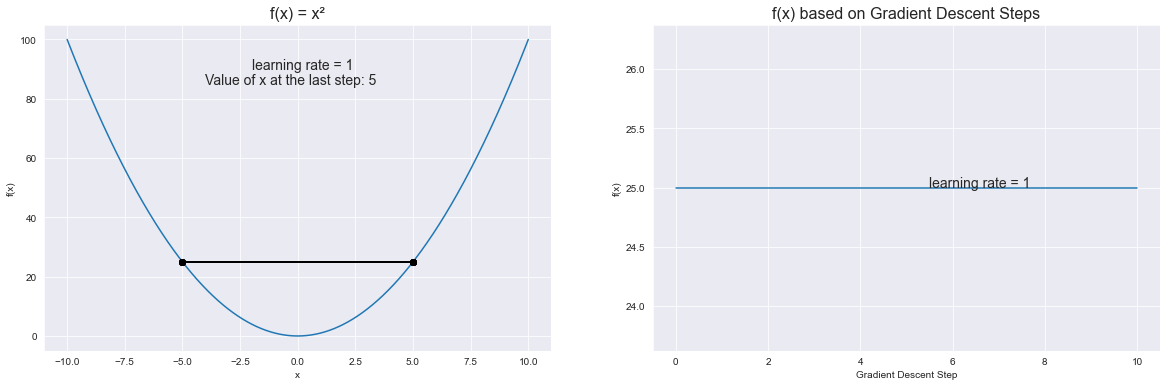

In [20]:
plot_gradient_descent(starting_x=5, learning_rate=1, n_gradient_descent_steps=10)

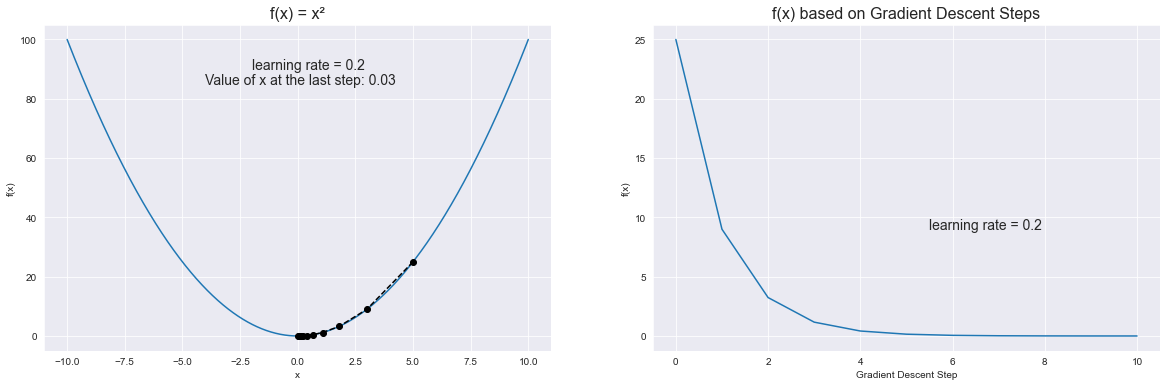

In [21]:
plot_gradient_descent(starting_x=5, learning_rate=0.2, n_gradient_descent_steps=10)

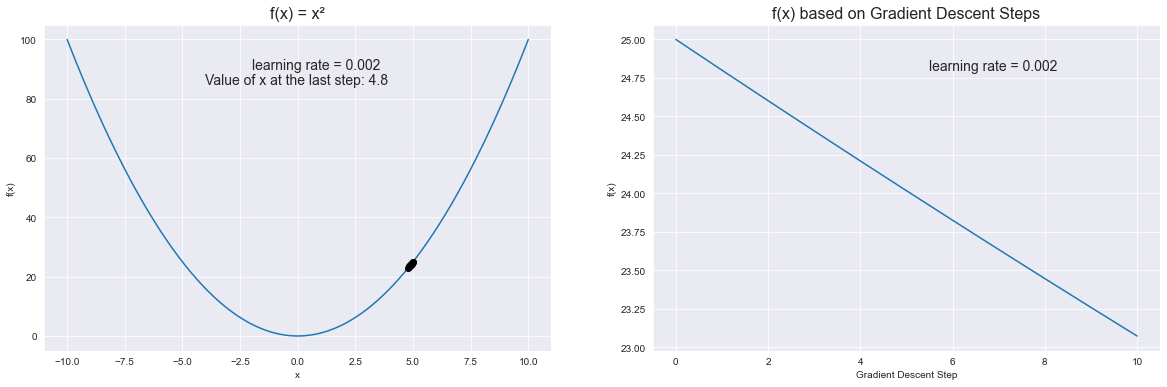

In [22]:
# learning raate too small
plot_gradient_descent(starting_x=5, learning_rate=0.002, n_gradient_descent_steps=10)

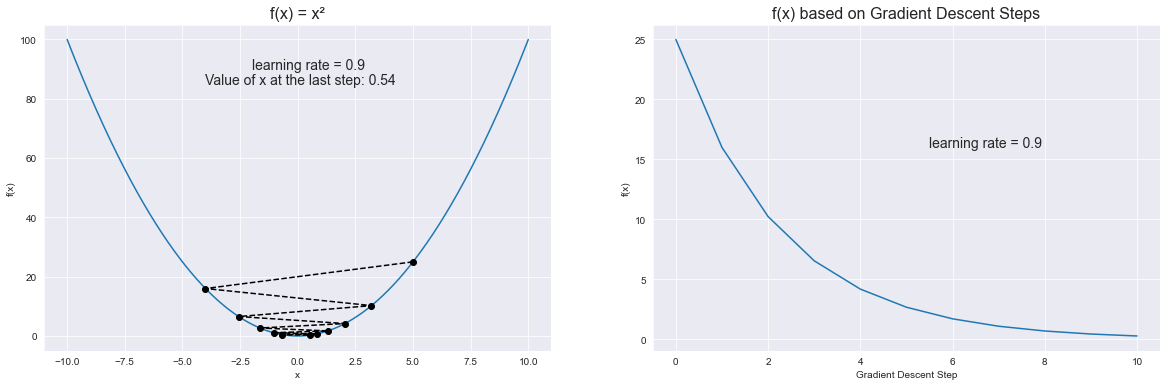

In [23]:
# bigger learning rate
plot_gradient_descent(starting_x=5, learning_rate=0.9, n_gradient_descent_steps=10)

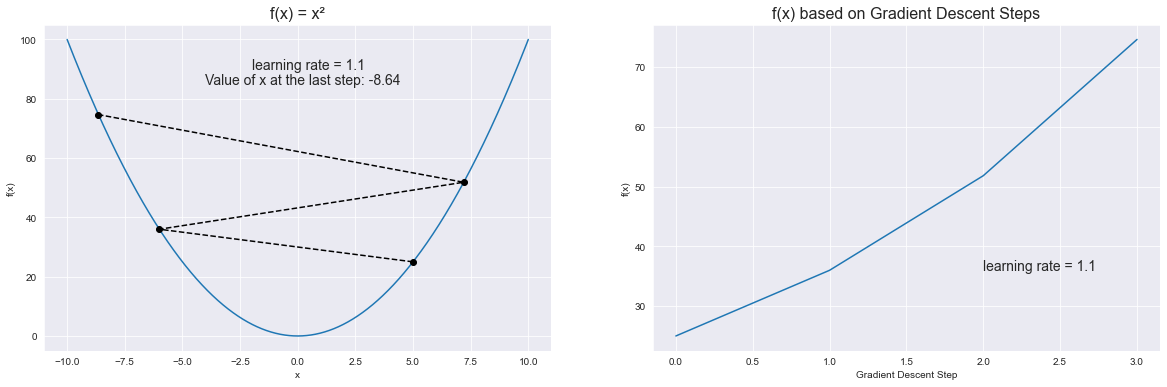

In [24]:
plot_gradient_descent(starting_x=5, learning_rate=1.1, n_gradient_descent_steps=3)

Let's train our neural network with different learning rates.

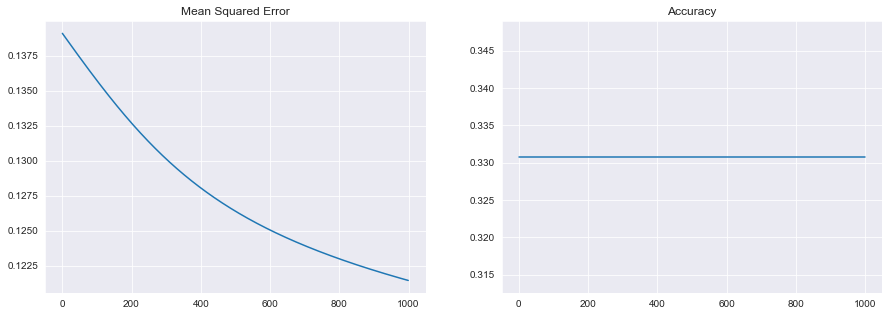

In [25]:
# small learning rate
weights_hidden, weights_out, monitoring_df = train_mlp(X_train, Y_train, 
                                                       learning_rate=.01, epochs=1000)

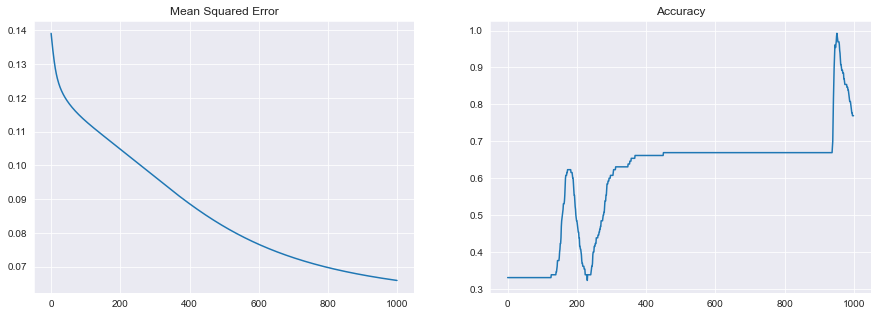

In [26]:
# bigger learning rate
weights_hidden, weights_out, monitoring_df = train_mlp(X_train, Y_train, 
                                                       learning_rate=.3, epochs=10**3)

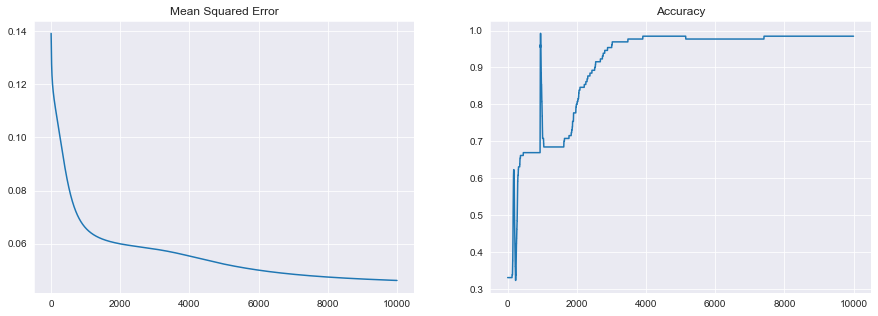

In [27]:
# more epochs
weights_hidden, weights_out, monitoring_df = train_mlp(X_train, Y_train, 
                                                       learning_rate=.3, epochs=10**4)

The last model seems to perform nicely on the train set. Let's test it. 

In [28]:
test_mpl(X_test, Y_test, weights_hidden, weights_out)

Accuracy: 0.95


### Further Reading

[Basics of Deep Learning](https://www.youtube.com/watch?v=4bvJRE5K5p4&list=PLPOTBrypY74wOpTIWQhqNdfV5gIt1h1fa&ab_channel=SebastianMantey)

[Deep Learning Tutorial](https://github.com/SebastianMantey/Deep-Learning-Tutorial)

***

DataKolektiv, 2022/23.

[hello@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com)

![](../img/DK_Logo_100.png)

<font size=1>License: [GPLv3](https://www.gnu.org/licenses/gpl-3.0.txt) This Notebook is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version. This Notebook is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details. You should have received a copy of the GNU General Public License along with this Notebook. If not, see http://www.gnu.org/licenses/.</font>